<a href="https://colab.research.google.com/github/diditiswantoro123/Skripsi/blob/main/klasifikasi_penyakit_tanaman_jagung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os                                                                         #Mengimpor modul os mengakses folder data
fold_bercak_daun = os.path.join('/content/penyakitjagung/bercakdaun')             #Mendefinisikan Folder Training untuk gambar Gunting
fold_hawar_daun= os.path.join('/content/penyakitjagung/hawardaun')                #Mendefinisikan Folder Training untuk gambar Batu
fold_karat_daun = os.path.join('/content/penyakitjagung/karatdaun')               #Mendefinisikan Folder Training untuk gambar Kertas

print('Jumlah total gambar bercak daun:', len(os.listdir(fold_bercak_daun)))      #Menampilkan jumlah gambar di dalam folder Gunting
print('Jumlah total gambar hawar daun:', len(os.listdir(fold_hawar_daun)))              #Menampilkan jumlah gambar di dalam folder Batu
print('Jumlah total gambar karat daun:', len(os.listdir(fold_karat_daun)))            #Menampilkan jumlah gambar di dalam folder Kertas

print("Menampilkan nama file gambar:")                                     
file_bercakdaun = os.listdir(fold_bercak_daun)                                    #Mendaftar file di dalam folder gunting
print("bercak daun:",file_bercakdaun[:5])                                            #Menampilkan nama 5 file pertama di dalam folder gunting

file_hawardaun = os.listdir(fold_hawar_daun)                                      #Mendaftar file di dalam folder batu
print("hawar daun:",file_hawardaun[:5])                                                #Menampilkan nama 5 file pertama di dalam folder batu

file_karatdaun = os.listdir(fold_karat_daun)                                      #Mendaftar file di dalam folder kertas
print("karat daun:",file_karatdaun[:5])                                              #Menampilkan nama 5 file pertama di dalam folder kertas


Jumlah total gambar bercak daun: 1000
Jumlah total gambar hawar daun: 1000
Jumlah total gambar karat daun: 1000
Menampilkan nama file gambar:
bercak daun: ['bercak_daun_527.jpg', 'bercak_daun_229.JPG', 'bercak_daun_17.jpg', 'bercak_daun_422.JPG', 'bercak_daun_591.JPG']
hawar daun: ['hawar_daun_116.JPG', 'hawar_daun_89.jpg', 'hawar_daun_441.jpg', 'hawar_daun_570.JPG', 'hawar_daun_83.JPG']
karat daun: ['karat_daun_451.JPG', 'karat_daun_6.JPG', 'karat_daun_135.JPG', 'karat_daun_702.JPG', 'karat_daun_371.JPG']


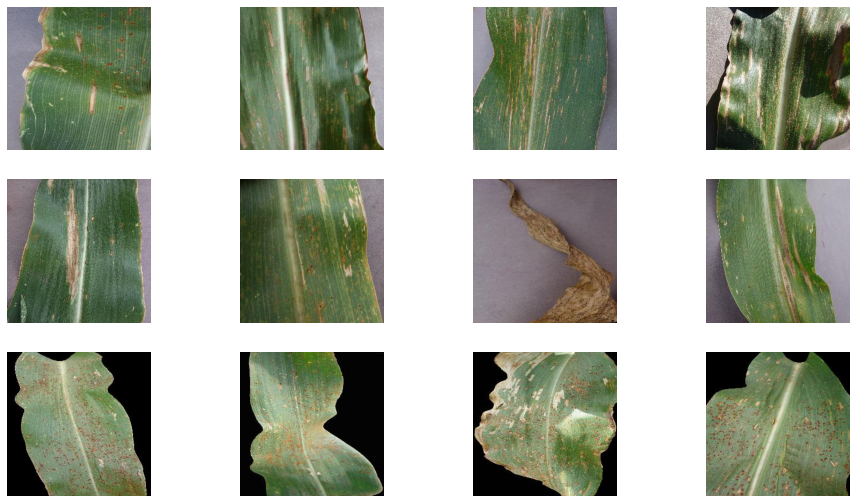

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt                                                   #Mengimpor modul matplotlib
import matplotlib.image as mpimg

nrows = 3                                                                         #Jumlah baris tampilan gambar
ncols = 4                                                                         #Jumlah baris tampilan gambar

pic_index = 0                                                                     #Index awal untuk iterasi gambar

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 3)                                         #Mengatur gambar output matplotlib, dan ukurannya agar menjadi 4*6 gambar

pic_index += 4                                                                    #Index tambah bertambah 4 setiap baris
gbr_tampil_bercak_daun  = [os.path.join(fold_bercak_daun, fname)                  #Menampilkan gambar gunting
                      for fname in file_bercakdaun[pic_index-4:pic_index]]
gbr_tampil_hawar_daun     = [os.path.join(fold_hawar_daun, fname)                 #Menampilkan gambar batu
                      for fname in file_hawardaun[pic_index-4:pic_index]]
gbr_tampil_karat_daun   = [os.path.join(fold_karat_daun, fname)                   #Menampilkan gambar kertas
                      for fname in file_karatdaun[pic_index-4:pic_index]]

for i, img_path in enumerate(gbr_tampil_bercak_daun+gbr_tampil_hawar_daun+gbr_tampil_karat_daun):
  sp = plt.subplot(nrows, ncols, i + 1)                                           #Mengatur subplot; indeks subplot dimulai dari 1
  sp.axis('Off')                                                                  #Tidak menampilkan Gridlines

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

Mengimport modul yang digunakan

In [ ]:
import tensorflow as tf                                                           #Mengimpor modul tensorflow 
import keras_preprocessing                                                        #Mengimpor modul keras 
from keras_preprocessing import image                                             #Mengimpor keras_preprocessing untuk gambar  
from keras_preprocessing.image import ImageDataGenerator                          #Mengimpor Image Generator

**Melakukan Augmentasi & Pemisahan Data menjadi Training dan Validation**

Data dikelompokkan menjadi Data Training dan Data Validasi, masing masing folder tersebut masih juga terbagi ke dalam folder bercak daun, hawar daun, dan Karat daun untuk melakukan pelabelan menggunakan Image Generator, skema nya adalah sebagai berikut:

In [ ]:
BASIS_DIR = "/content/penyakitjagung/bhk-cv-images/"                           #Menyiapkan folder utama
training_datagen = ImageDataGenerator(                                            #Image generator
      rescale = 1./255,                                                           #Menormalisasi data
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>AUGMENTASI<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
	    rotation_range=40,                                                          #Menerapkan skenario rotasi gambar hingga 40 derajat          
      width_shift_range=0.2,                                                      #Menerapkan skenario pelebaran gambar hingga hingga sebanyak 0.2 dari ukuran asli
      height_shift_range=0.2,                                                     #Menerapkan skenario peninggian gambar hingga hingg sebanyak 0.2 dari ukuran asli
      shear_range=0.2,                                                            #Menerapkan skenario pemangkasan gambar gambar hingga sebanyak 0.2 dari ukuran asli 
      zoom_range=0.2,                                                             #Menerapkan skenario zoom gambar hingga sebesar 0.2 
      horizontal_flip=True,                                                       #Menerapkan skenario putar balik gambar secara horizontal 
      fill_mode='nearest',                                                        #Mengisi piksel yang kosong dengan nilai piksel terdekat 
#>>>>>>>>>>>MEMECAH DATA MENJADI DATA TRAINING DAN DATA VALIDASI<<<<<<<<<<<<<<<<      
      validation_split=0.2                                                        #80% Data Training, 20% Data Validasi
      )

Pelabelan data menggunakan Image Data Generator berdasarkan Folder

In [ ]:
train_generator = training_datagen.flow_from_directory(                           #Generator data training
	BASIS_DIR,                                                                      #Folder target untuk digenerasi
	target_size=(150,150),                                                          #Mengubah resolusi seluruh gambar menjadi 150x150 piksel
	class_mode='categorical',                                                       #Kelas data kategori untuk klasifikasi multivariabel
  shuffle=True,                                                                   
  subset='training'                                                               #Untuk data training
  )

validation_generator = training_datagen.flow_from_directory(                      #Generator data validasi
	BASIS_DIR,                                                                      #Folder target untuk digenerasi
	target_size=(150,150),                                                          #Mengubah resolusi seluruh gambar menjadi 150x150 piksel
	class_mode='categorical',                                                       #Kelas data kategori untuk klasifikasi multivariabel
  shuffle=True,
  subset='validation'                                                             #Untuk data validasi
  )

Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


**Membangun Model Jaringan Saraf Tiruan**

Model yang digunakan adalah model Sequential

In [ ]:
model = tf.keras.models.Sequential([                                              #Membentuk model sequential
                                                                                  #Bentuk input adalah gambar dengan ukuran 150x150 dengan 3 byte warna
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)), #Layer Konvolusi pertama
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),                         #Layer Konvolusi kedua
    tf.keras.layers.MaxPooling2D(2,2), 
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),                         #Layer Konvolusi ketiga
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),                                                    #Layer input untuk Deep Learning Neural Network
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(128, activation='relu'),                                #Hiden layer pertama dengan 512 neuron
    
    tf.keras.layers.Dense(512, activation='relu'),                                #Hiden layer kedua dengan 512 neuron
    
    tf.keras.layers.Dense(3, activation='softmax')                                #Layer output
])

model.summary()                                                                   #Menampilkan summary model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 32)       0

**Melakukan Kompilasi Model**

In [ ]:
model.compile(loss = 'categorical_crossentropy',                                  #Loss function Yang digunakan untuk Klasifikasi Kategori Lebih Dari 2
              optimizer='rmsprop',                                                #Fungsi optimizer(Yang Pernah diajarkan adalah 'adam')
              metrics=['accuracy'])                                               #Menampilkan akurasi model training

**Melatih Model Jaringan Saraf Tiruan**

In [ ]:
history=model.fit(
    train_generator,                                                              #Data training hasil generasi
    steps_per_epoch=4,                                                            #Jumlah batch yang akan dieksekusi pada setiap epoch
    epochs=50,                                                                    #Jumlah perulangan komputasi(epoch)
    validation_data=validation_generator,                                         #Menampilkan akurasi pengujian data validasi
    validation_steps=4,                                                           #Jumlah batch yang akan dieksekusi pada setiap epoch
    verbose=2
    )

Epoch 1/50
4/4 - 2s - loss: 0.4490 - accuracy: 0.7109 - val_loss: 0.3797 - val_accuracy: 0.7891 - 2s/epoch - 590ms/step
Epoch 2/50
4/4 - 2s - loss: 0.5406 - accuracy: 0.6875 - val_loss: 0.4318 - val_accuracy: 0.7500 - 2s/epoch - 536ms/step
Epoch 3/50
4/4 - 2s - loss: 0.5204 - accuracy: 0.6875 - val_loss: 0.4254 - val_accuracy: 0.7422 - 2s/epoch - 528ms/step
Epoch 4/50
4/4 - 2s - loss: 0.5384 - accuracy: 0.6484 - val_loss: 0.4197 - val_accuracy: 0.7812 - 2s/epoch - 519ms/step
Epoch 5/50
4/4 - 2s - loss: 0.4322 - accuracy: 0.7656 - val_loss: 0.4702 - val_accuracy: 0.7109 - 2s/epoch - 537ms/step
Epoch 6/50
4/4 - 2s - loss: 0.4393 - accuracy: 0.7188 - val_loss: 0.3950 - val_accuracy: 0.6719 - 2s/epoch - 523ms/step
Epoch 7/50
4/4 - 2s - loss: 0.4954 - accuracy: 0.7344 - val_loss: 0.5940 - val_accuracy: 0.6719 - 2s/epoch - 547ms/step
Epoch 8/50
4/4 - 2s - loss: 0.5330 - accuracy: 0.7031 - val_loss: 0.4615 - val_accuracy: 0.7109 - 2s/epoch - 552ms/step
Epoch 9/50
4/4 - 2s - loss: 0.4731 - acc

**Ploting Akurasi Training dan Validasi**

Melihat pergerakan besaran nilai akurasi Training dan Validasi

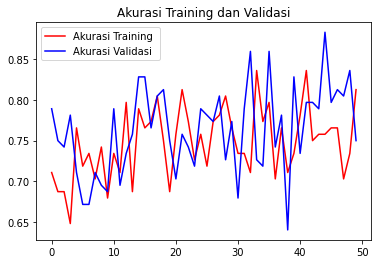

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt                                                   #Mengimpor modul matplotlib
acc = history.history['accuracy']                                                 #Nilai akurasi training
val_acc = history.history['val_accuracy']                                         #Nilai akurasi validasi
loss = history.history['loss']                                                    #Nilai loss training
val_loss = history.history['val_loss']                                            #Nilai loss validasi

epochs = range(len(acc))                                                          #Jumlah epoch

plt.plot(epochs, acc, 'r', label='Akurasi Training ')                             #Plot nilai akurasi training                     
plt.plot(epochs, val_acc, 'b', label='Akurasi Validasi')                          #Plot nilai akurasi validasi
plt.title('Akurasi Training dan Validasi')                                        #Menamai gambar
plt.legend(loc=0)                                                                 #Menampilkan legenda
plt.figure()                                                                      
plt.show()

**Uji Coba Model Klasifikasi Gambar bercak daun, hawar daun,dan karat daun**

Melakukan simulasi klasifikasi, mengunggah gambar dan model menentukan apakah gambar tersebut merupakan gambar tangan yang membentuk bercak daun, hawar daun, atau karat daun

Saving hawar_daun_1.jpg to hawar_daun_1 (1).jpg
hawar_daun_1.jpg
Penyakit Ini Menunjukkan bentuk bercak Daun


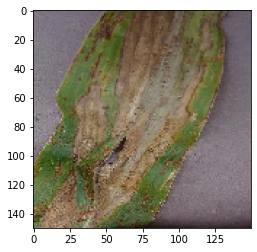

In [ ]:
import numpy as np                                                                #Mengimpor modul numpy
from google.colab import files                                                    #Mengimpor modul import file
from keras.preprocessing import image                                             #Mengimpor modul keras_preprocessing untuk gambar

uploaded = files.upload()                                                         #Mengunggah gambar yang akan dikenali model

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(150, 150))                              #Mengubah ukuran gambar menjadi 150x150 piksel
  imgplot = plt.imshow(img)                                                       #Menampilkan gambar yang diunggah
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes[0][0]==1:
    print('Penyakit Ini Menunjukkan bentuk bercak Daun')                          #Jika gambar tangan membentuk Kertas, tampilkan tulisan "Kertas"
  elif classes[0][1]==1:
    print('Penyakit Ini Menunjukkan bentuk hawar Daun')                           #Jika gambar tangan membentuk Batu, tampilkan tulisan "Batu"
  elif classes[0][2]==1:
    print('Penyakit Ini Menunjukkan bentuk karat Daun')                           #Jika gambar tangan membentuk Gunting, tampilkan tulisan "Gunting"
  else:
    print('Tidak Diketahui')                                                      #Jika gambar yang diunggah selain gambar tangan yang diinginkan, tampilkan "Tida

# **Program Klasifikasi Gambar dengan Kriteria Henti(Callback)**





Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 32)      

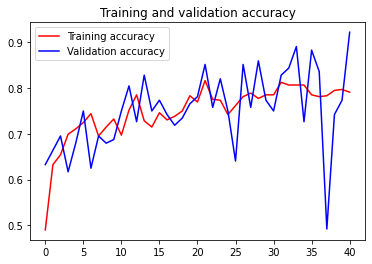

<Figure size 432x288 with 0 Axes>

In [ ]:
#>>>>>>>>>>>>>>>>>>>>>>>>>KRITERIA HENTI TRAINING MODEL<<<<<<<<<<<<<<<<<<<<<<<<<
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.9):
      print("\nPELATIHAN BERHENTI, AKURASI MODEL SUDAH LEBIH DARI 90%!")
      self.model.stop_training = True

callbacks = myCallback()

#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>MEMBANGUN MODEL<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),                         
    tf.keras.layers.MaxPooling2D(2,2), 
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),                         
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),                                                    
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(128, activation='relu'),                                
    
    tf.keras.layers.Dense(512, activation='relu'),                                
    
    tf.keras.layers.Dense(3, activation='softmax')                                
])

model.summary()

#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>MENGKOMPILASI MODEL<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>MELATIH MODEL<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
history=model.fit(
    train_generator,
    steps_per_epoch=16,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=4, 
    verbose=2,
    callbacks=[callbacks]
    )

#>>>>>>>>>>>>>>>>>>>>>>>>PLOT AKURASI TRAINING & VALIDASI<<<<<<<<<<<<<<<<<<<<<<<
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()